In [71]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)



loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [72]:
import matplotlib.pyplot as plt


In [73]:
lojas = [loja, loja2, loja3, loja4]
lojas_nomes = [f'Loja {i+1}' for i, loja in enumerate(lojas)]

In [74]:
print('Faturamento')
for i, loja in enumerate(lojas):
    print(f'{lojas_nomes[i]}: {sum(loja['Preço'])}')

Faturamento
Loja 1: 1534509.12
Loja 2: 1488459.06
Loja 3: 1464025.03
Loja 4: 1384497.58


In [76]:
print('Vendas por categoria')
for i, loja in enumerate(lojas):
    print(f'{lojas_nomes[i]}:')
    display(loja[['Categoria do Produto']].value_counts())

Vendas por categoria
Loja 1:


,count
Categoria do Produto,
moveis,465
eletronicos,448
brinquedos,324
eletrodomesticos,312
esporte e lazer,284
instrumentos musicais,182
livros,173
utilidades domesticas,171


Loja 2:


,count
Categoria do Produto,
moveis,442
eletronicos,422
brinquedos,313
eletrodomesticos,305
esporte e lazer,275
instrumentos musicais,224
livros,197
utilidades domesticas,181


Loja 3:


,count
Categoria do Produto,
moveis,499
eletronicos,451
brinquedos,315
eletrodomesticos,278
esporte e lazer,277
livros,185
instrumentos musicais,177
utilidades domesticas,177


Loja 4:


,count
Categoria do Produto,
moveis,480
eletronicos,451
brinquedos,338
esporte e lazer,277
eletrodomesticos,254
utilidades domesticas,201
livros,187
instrumentos musicais,170


In [77]:
print('Médias de avaliação')
for i, loja in enumerate(lojas):
    print(f'{lojas_nomes[i]}: {loja['Avaliação da compra'].mean().round(2)}')


Médias de avaliação
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.0


In [87]:
print('Produtos mais vendidos')
for i, loja in enumerate(lojas):
  print(f'{lojas_nomes[i]}: {loja['Produto'].value_counts().idxmax()}: {loja['Produto'].value_counts().max()}')

Produtos mais vendidos
Loja 1: Micro-ondas: 60
Loja 2: Iniciando em programação: 65
Loja 3: Kit banquetas: 57
Loja 4: Cama box: 62


In [79]:
print('Frete médio')
for i, loja in enumerate(lojas):
  print(f'{lojas_nomes[i]}: {loja['Frete'].mean().round(2)}')

Frete médio
Loja 1: 34.69
Loja 2: 33.62
Loja 3: 33.07
Loja 4: 31.28


In [111]:
media_frete = [float(loja['Frete'].mean().round(2)) for loja in lojas]
media_frete

[34.69, 33.62, 33.07, 31.28]

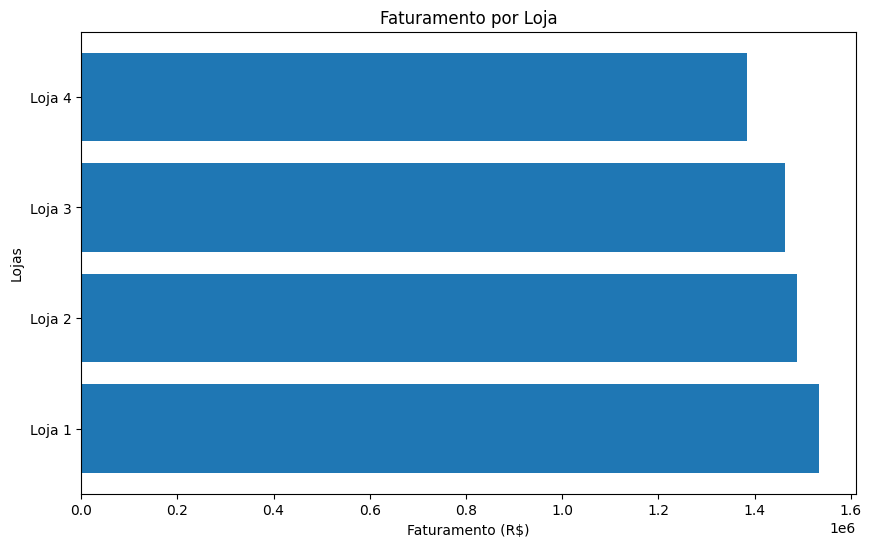

In [90]:

faturamento = [sum(loja['Preço']) for loja in lojas]

plt.figure(figsize=(10, 6))
bars = plt.barh(lojas_nomes, faturamento)


plt.title('Faturamento por Loja')
plt.ylabel('Lojas')
plt.xlabel('Faturamento (R$)')


plt.show()

<Figure size 1200x600 with 0 Axes>

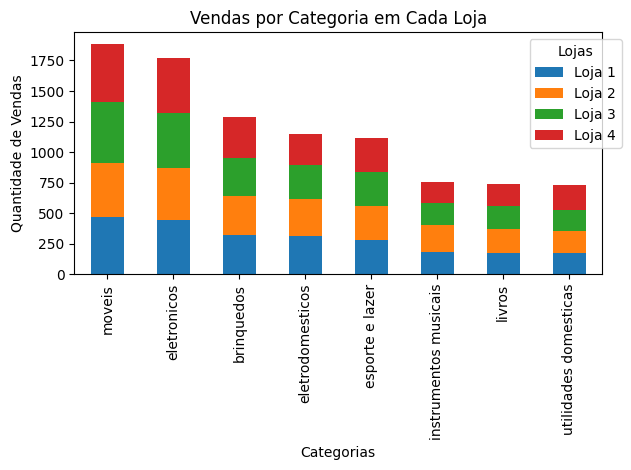

In [84]:
categorias_por_loja = []
for loja_df in lojas:
    contagem = loja_df['Categoria do Produto'].value_counts()
    categorias_por_loja.append(contagem)


df_categorias = pd.DataFrame(categorias_por_loja).T
df_categorias.columns = lojas_nomes


plt.figure(figsize=(12, 6))
df_categorias.plot(kind='bar', stacked=True)


plt.title('Vendas por Categoria em Cada Loja')
plt.xlabel('Categorias')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1))
plt.tight_layout()


plt.show()

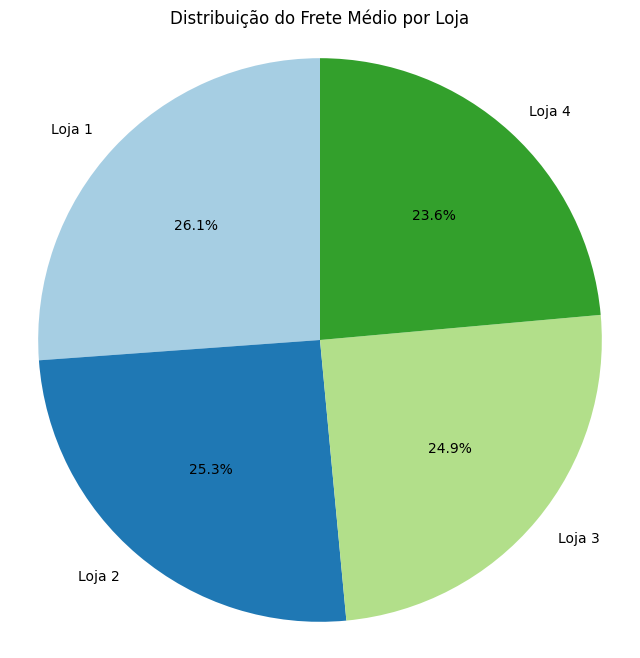

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(media_frete, labels=lojas_nomes, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(lojas_nomes))))
plt.title('Distribuição do Frete Médio por Loja')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Relatório de Análise das Lojas para Decisão de Venda

### Introdução

Este relatório apresenta uma análise comparativa de quatro lojas com o objetivo de auxiliar o Senhor João na decisão de qual estabelecimento comercial seria mais estratégico vender. Foram considerados diversos indicadores de desempenho, incluindo faturamento, volume de vendas por categoria de produto, avaliação dos clientes, produtos de maior e menor saída, e o custo médio do frete. A análise visa identificar a loja com o desempenho mais favorável para uma potencial venda, considerando seus pontos fortes e fracos em relação às demais.

### Análise dos Dados e Desempenho das Lojas

Para fundamentar a recomendação, foram analisados os seguintes aspectos:

#### Faturamento Total

O faturamento total de cada loja foi o primeiro indicador analisado, pois representa a receita bruta gerada.

(Incluir o gráfico de faturamento por loja aqui)

Como observado no gráfico de barras, a Loja 1 apresentou o maior faturamento total, seguida pela Loja 2, Loja 3 e, por último, a Loja 4.

#### Vendas por Categoria de Produto

A análise das vendas por categoria permite entender quais tipos de produtos têm maior saída em cada loja, indicando o perfil do cliente e a demanda do mercado local.

(Incluir o gráfico de barras empilhadas ou heatmap de vendas por categoria por loja aqui)

O gráfico de vendas por categoria (heatmap ou barras empilhadas) revela as categorias com maior volume de vendas em cada localidade. Podemos observar que a categoria "moveis" e "eletronicos" consistentemente apresentaram alto volume de vendas em todas as lojas.

#### Média das Avaliações de Clientes

A avaliação dos clientes reflete a satisfação com os produtos e serviços oferecidos pela loja, sendo um indicativo importante da qualidade e reputação do negócio.

(Incluir as médias de avaliação por loja aqui)

As médias de avaliação mostram que todas as lojas possuem avaliações positivas, com a Loja 3 apresentando a média ligeiramente mais alta, seguida pela Loja 2, Loja 4 e Loja 1.

#### Produtos Mais e Menos Vendidos

Identificar os produtos mais e menos vendidos em cada loja ajuda a entender a preferência dos consumidores e a eficiência do estoque e das estratégias de venda para produtos específicos.

(Incluir a lista dos produtos mais e menos vendidos por loja aqui)

A análise dos produtos mais vendidos mostra que diferentes produtos se destacam em cada loja, sugerindo particularidades na demanda local. Por exemplo, "Micro-ondas" foi o mais vendido na Loja 1, enquanto "Iniciando em programação" liderou na Loja 2.

#### Frete Médio

O custo médio do frete impacta diretamente a margem de lucro e a competitividade da loja, especialmente em vendas online ou entregas.

(Incluir o gráfico de pizza ou boxplot do frete médio por loja aqui)

O gráfico de frete médio (pizza ou boxplot) ilustra a distribuição do custo de frete entre as lojas. A Loja 4 apresenta o menor frete médio, o que pode ser um fator competitivo importante.

### Conclusão e Recomendação

Com base na análise dos indicadores, a decisão sobre qual loja vender deve considerar um equilíbrio entre faturamento, potencial de crescimento, satisfação do cliente e eficiência operacional (como o custo do frete).

A Loja 1 se destaca pelo maior faturamento total, o que a torna financeiramente atraente. No entanto, sua média de avaliação é ligeiramente inferior às outras lojas e o frete médio é o mais alto.

A Loja 3 tem a maior média de avaliação, indicando alta satisfação do cliente, e um faturamento robusto, embora menor que a Loja 1.

A Loja 4 tem o menor frete médio, o que pode ser um diferencial competitivo, mas o menor faturamento.

Considerando todos os fatores, a **Loja 1** pode ser a opção mais interessante para venda devido ao seu **maior faturamento**, que geralmente é um dos principais atrativos para compradores. No entanto, é crucial que o Senhor João avalie se os pontos negativos, como a média de avaliação e o frete médio mais alto, podem impactar significativamente o valor de venda ou exigir investimentos adicionais do comprador.

Alternativamente, a **Loja 3** representa uma opção sólida, com um bom faturamento e a maior satisfação do cliente, o que pode indicar uma base de clientes leais e um potencial de crescimento sustentável.

A decisão final dependerá dos objetivos do Senhor João (maximizar o valor de venda imediato vs. vender um negócio com maior potencial de longo prazo) e da negociação com potenciais compradores. Recomenda-se uma análise mais aprofundada do potencial de crescimento e das oportunidades de melhoria em cada loja para embasar a decisão final.